In [43]:
import numpy as np
import pandas as pd

In [44]:
filepath="framingham.csv"
df_org=pd.read_csv(filepath)

In [45]:
class Model:
    mx=None
    mn=None
    w=None
    b=None
    def save(self):
        with open('model.txt','w') as fh:
            s=''
            for x in self.mx: s+=str(x)+' '
            s+='\n\n'
            for x in self.mn: s+=str(x)+' '
            s+='\n\n'
            for r in self.w:
                for e in r:
                    s+=str(e)+' '
            s+='\n\n'
            s+=str(b)
            fh.write(s)
    def normalize(self,data):
        return (data-self.mn)/(self.mx-self.mn)

model=Model()

In [46]:
#Data clean up
df=df_org.dropna()
new_df=df.drop(df[df['TenYearCHD']==0].sample(frac=0.8).index)

dataset=new_df.to_numpy()

np.random.shuffle(dataset)

datasetX=dataset[:,0:-1]
datasetY=dataset[:,-1]

model.mn=np.min(datasetX,axis=0)
model.mx=np.max(datasetX,axis=0)

#normalize
datasetX=model.normalize(datasetX)

In [47]:
#Flatten dataset and divide it into sets

flat_dataset_X=datasetX.reshape((datasetX.shape[0],-1)).T

trainX,trainY = flat_dataset_X[:,100:],datasetY[100:]

testX,testY=flat_dataset_X[:,:100],datasetY[:100]

trainY=trainY.reshape(trainY.shape[0],1).T
testY=testY.reshape(testY.shape[0],1).T

In [48]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [49]:
def calc_cost(A,Y,m):
    return -np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/m

In [50]:
def train(X,Y,alpha,itercount,print_cost,print_at=100,stored_cost_len=5000):
    assert(X.shape[1]==Y.shape[1])
    m=X.shape[1]
    w=np.zeros((X.shape[0],1))
    b=0.0
    count=0
    
    costs=[]
    
    print("training...")
    for _ in range(itercount):
        Z=np.dot(w.T,X)+b
        A=sigmoid(Z)
        
        dZ=(A-Y)/m
        dW=np.dot(X,dZ.T)
        db=np.sum(dZ)
        w=w-alpha*dW
        b=b-alpha*db
        
        cost=calc_cost(A,Y,m)
        if len(costs)==stored_cost_len:
            costs.pop(0)
        costs.append(cost)
        
        if print_cost:
            if count%print_at==0:        
                print(f"Cost at iteration {count} = {cost}")
            count+=1
        
    print("finished...")
    print("Cost=",cost)
    return w,b,costs

In [51]:
w,b,costs=train(trainX,trainY,0.1,100000,True,print_at=5000,stored_cost_len=20000)
model.w=w
model.b=b

training...
Cost at iteration 0 = 0.6931471805599452
Cost at iteration 5000 = 0.6020063201654835
Cost at iteration 10000 = 0.5999058663395035
Cost at iteration 15000 = 0.5992177835896025
Cost at iteration 20000 = 0.5988855168441009
Cost at iteration 25000 = 0.5987055527044945
Cost at iteration 30000 = 0.5986035962511852
Cost at iteration 35000 = 0.5985444622282061
Cost at iteration 40000 = 0.5985096628620958
Cost at iteration 45000 = 0.5984889772428147
Cost at iteration 50000 = 0.5984765883857485
Cost at iteration 55000 = 0.5984691242548876
Cost at iteration 60000 = 0.5984646051355327
Cost at iteration 65000 = 0.5984618577309262
Cost at iteration 70000 = 0.5984601815109609
Cost at iteration 75000 = 0.5984591556806312
Cost at iteration 80000 = 0.5984585261907038
Cost at iteration 85000 = 0.598458138995422
Cost at iteration 90000 = 0.5984579003356054
Cost at iteration 95000 = 0.5984577529574995
finished...
Cost= 0.5984576618124069


In [52]:
model.save()

In [53]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'last few costs')

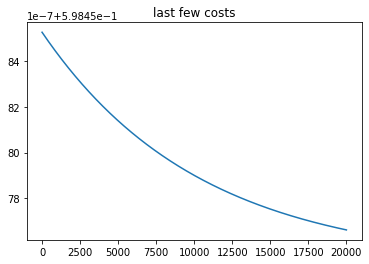

In [54]:
plot=plt.plot(costs)
plt.title("last few costs")

In [55]:
#TEST
def test(X,Y,w,b):
    Z=np.dot(w.T,X)+b
    A=sigmoid(Z)
    A=np.rint(A)
    accuracy=np.sum(A==Y)/A.shape[1]
    return 100*accuracy

In [56]:
print(test(testX,testY,w,b),"%")
print(test(trainX,trainY,w,b),"%")

72.0 %
67.40947075208913 %


(array([620.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 557.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

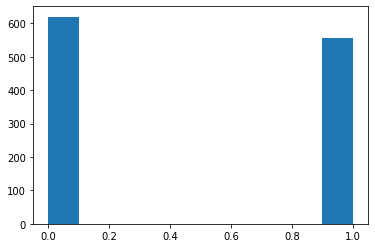

In [57]:
plt.hist(datasetY)

In [58]:
df['diabetes'].unique()

array([0, 1])

In [59]:
def single_input_test(arr,w,b):
    assert(arr.shape==(trainX.shape[0],1) and w.shape==(trainX.shape[0],1))
    arr=model.normalize(arr)
    arr=arr.T
    z=np.dot(w.T,arr)+b
    a=sigmoid(z)
    print(a)

In [60]:
x1=np.array([[1,39,4,0,0,0,0,0,0,195,106,70,26.97,80,77]])
single_input_test(x1,w,b)
x2=np.array([[1,0.78947368,0,1,0.28571429,0,0,0,0,0.37371663,0.26241135,0.33862434,0.13911779,0.19191919,0.16101695]])
single_input_test(x2,w,b)

AssertionError: 

In [ ]:
x1=np.array([[1,39,4,0,0,0,0,0,0,195,106,70,26.97,80,77]])
print(x1.shape)
b1=model.normalize(x1)
print(b1.shape)